# Exclusive OR (XOR)

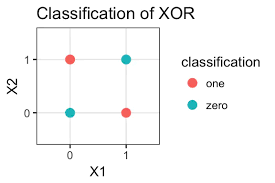

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
Y = [[0], [1], [1], [0]]
print(*zip(X, Y))

In [ ]:
for i, x in enumerate(X):
    if Y[i] == [1]:
        plt.plot(x[0], x[1], 'ro')
    else:
        plt.plot(x[0], x[1], 'bx')
plt.xticks([-0.5, 0.0, 0.5, 1.0, 1.5])
plt.yticks([-0.5, 0.0, 0.5, 1.0, 1.5])
plt.grid(visible=True)
plt.legend(['One', 'Zero'])
plt.show()

# PyTorch가 학습을 진행하는 절차

In [ ]:
import torch

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

In [ ]:
# w는 랜덤한 Weight 값이 들어있는 텐서, t는 정답 레이블
w = torch.rand(2, requires_grad=True)
w_init = w.clone().detach()
t = torch.FloatTensor([1, 0])
print('Initial Weight: ', w)
print('Target: ', t)

In [ ]:
from torch import optim

In [ ]:
# 학습을 하기위해 Optimizer에 가중치를 넣어줌
opt = optim.SGD([w], lr=1e-2)

In [ ]:
# 아직 아무 연산도 하지 않아 Gradient가 없는 상태
print(w.grad)

# Gradient Descent Algorithm
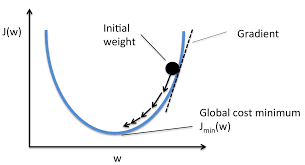

# Variations of GD
![image.png](https://media.vlpt.us/images/nayeon_p00/post/26cb254f-fbb5-49ed-b77d-396c28204032/image.png)

# Binary Cross Entropy Loss
![image.png](https://miro.medium.com/max/1198/1*-WnDbUWnwhRLbFV0rnLcrg.png)

$$
    \ell(x, y) = L = \{l_1,\dots,l_N\}^\top, \quad
    l_n = - w_n \left[ y_n \cdot \log x_n + (1 - y_n) \cdot \log (1 - x_n) \right],
$$

>where `N` is the batch size.  
If `reduction` is not `'none'` (default `'mean'`),  
then,

$$
    \ell(x, y) = \begin{cases}
        \operatorname{mean}(L), & \text{if reduction} = \text{mean}\\
        \operatorname{sum}(L),  & \text{if reduction} = \text{sum}
    \end{cases}
$$

In [ ]:
# Binary Cross Entropy 구현
bce = -torch.mean(t*torch.log(w)+(1-t)*torch.log(1-w))
print(bce)

In [ ]:
import torch.nn as nn

In [ ]:
# 보통은 이미 구현되어 있는 PyTorch의 Loss 함수를 사용
criterion = nn.BCELoss()
bce = criterion(w, t)
print(bce)

In [ ]:
# 오차 역전파 함수
bce.backward()

In [ ]:
# 역전파 결과 Gradient가 연산됨
print(w.grad)

In [ ]:
# 연산된 Gradient를 가중치에 반영
opt.step()
print('Weight: ', w)
print('Initial Weight: ', w_init)

In [ ]:
# 아직 grad가 남아있음
print(w.grad)

In [ ]:
# 다음 학습전에 지워줘야함
opt.zero_grad()
w.grad

In [ ]:
from tqdm.auto import trange

In [ ]:
# 계속 수행하면 w에 BCE를 적용한 값이 1,0에 무한히 가까워짐
print(w)
for _ in trange(10000):
    print(w, end='\r')
    opt.zero_grad()
    bce = -torch.mean(t*torch.log(w)+(1-t)*torch.log(1-w))
    bce.backward()
    opt.step()

# PyTorch 신경망의 기본 구조

![image.png](https://www.researchgate.net/profile/Adem-Tekerek-2/publication/335903047/figure/fig1/AS:805611931443200@1569084260672/Proposed-artificial-neural-network-model-3-10-1-Neural-network-weight-vectors-are.png)

![image](https://miro.medium.com/max/1400/1*BMSfafFNEpqGFCNU4smPkg.png)

In [ ]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = torch.nn.Linear(2, 1, bias=True)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        return x

In [ ]:
import numpy as np

In [ ]:
# 시그모이드 함수 그래프를 그리는 코드
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

![image](https://assets-global.website-files.com/5d7b77b063a9066d83e1209c/60be4975a399c635d06ea853_hero_image_activation_func_dark.png)

In [ ]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = torch.FloatTensor([[0], [1], [1], [0]])

In [ ]:
model = Net()
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1.0)

In [ ]:
model.train()
for step in trange(1,10001):
    optimizer.zero_grad()
    hypothesis = model(X)

    # 비용 함수
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if step % 100 == 0:
        print(f'{step} | {cost.item():.6f}', end='\r')

In [ ]:
model.eval()
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('모델의 출력값(Hypothesis):')
    print(hypothesis.numpy())
    print('모델의 예측값(Predicted):')
    print(predicted.numpy())
    print('실제값(Y):')
    print(Y.numpy())
    print('정확도(Accuracy):')
    print(f'{accuracy.item()*100:.2f}%')

# 출력값이 0.5이므로 예측의 기준에 0.5를 포함시키냐에 따라 0, 1이 갈림

* XOR문제는 하나의 퍼셉트론(레이어)으로는 풀 수 없는 문제
* 하나의 퍼셉트론으로는 선형 분류만 가능하다`

![image2](https://miro.medium.com/max/1400/1*Tc8UgR_fjI_h0p3y4H9MwA.png)

## 선을 두개 그을 수 있다면??

# Practice
## 위 코드에서 hidden layer를 추가해 XOR문제를 해결해보자.
* Hint1: Hidden layer의 차원은 입력이나 출력의 shape과 상관없이 원하는 대로 정해도 된다.
* Hint2: Input layer의 출력 차원은 Hidden layer의 입력 차원과 맞춰주어야 한다.

In [ ]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        """
        여기에 코드작성
        """

    def forward(self, x):
        """
        여기에 코드작성
        """
        return x

In [ ]:
model = Net()
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1.0)

In [ ]:
for step in trange(1,10001):
    optimizer.zero_grad()
    hypothesis = model(X)

    # 비용 함수
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if step % 100 == 0:
        print(f'{step} | {cost.item():.6f}', end='\r')

In [ ]:
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('모델의 출력값(Hypothesis):')
    print(hypothesis.numpy())
    print('모델의 예측값(Predicted):')
    print(predicted.numpy())
    print('실제값(Y):')
    print(Y.numpy())
    print('정확도(Accuracy):')
    print(f'{accuracy.item()*100:.2f}%')

# To be continued...

`last edited by jaehan`